<a href="https://colab.research.google.com/github/vishnu190/PYTHON-PROJECT-CA3/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/project.csv')
print(data.shape)
print(data.head)
print(data.columns)


(30000, 25)
<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0          1      20000    2  ...         0         0                           1
1          2     120000    2  ...         0      2000                           1
2          3      90000    2  ...      1000      5000                           0
3          4      50000    2  ...      1069      1000                           0
4          5      50000    1  ...       689       679                           0
...      ...        ...  ...  ...       ...       ...                         ...
29995  29996     220000    1  ...      5000      1000                           0
29996  29997     150000    1  ...         0         0                           0
29997  29998      30000    1  ...      2000      3100                           1
29998  29999      80000    1  ...     52964      1804                           1
29999  30000      50000    1  ...      1000      1000   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
print(data.isna().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [8]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

data["EDUCATION"] = data["EDUCATION"].replace({4:0,5:0,6:0})
data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [9]:
data["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [11]:
x_train=data[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y_train=data['default payment next month']

In [12]:
print(y_train.head)
y_train.describe()

<bound method NDFrame.head of 0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64>


count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [50]:
df=pd.concat([x_train[['AGE','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',]],y_train],axis=1)


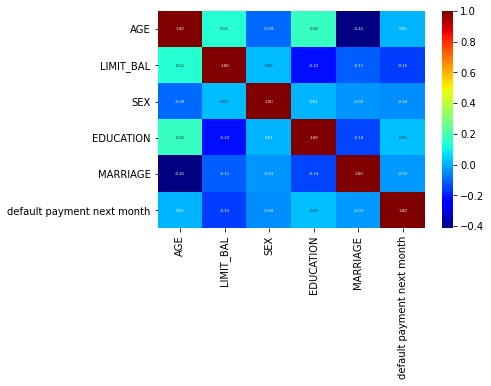

In [52]:
  # PERFORMING CO-RELATIONAL ANALYSIS
col=df.corr()

sns.heatmap(col,annot=True,cmap='jet',fmt='.2f',annot_kws={'size':4},
            cbar=True)

#i selected some of the features while creating a HEATMAP ,so that it would be clear

In [34]:
#TO find performance 


In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)


In [28]:
pred_train #print

array([0.47435529, 0.17588488, 0.22961685, ..., 0.72593788, 0.29121256,
       0.2810078 ])

In [ ]:
print('y=%.fx + %.2fc'%(m,c))

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE= ",mean_squared_error(y_train,pred_train))
print("R2= ",r2_score(y_train,pred_train))

MSE=  0.15092742192706313
R2=  0.12389312528465035


In [36]:

c=lr.intercept_
m=lr.coef_
print("SLOPE= ",m)
print("INTERCEPT= ",c)


SLOPE=  [-9.50675617e-08 -9.22338733e-08 -1.44567682e-02 -1.51401609e-02
 -2.38102715e-02  1.40380923e-03  9.59855234e-02  2.00822997e-02
  1.19418814e-02  7.64285208e-03 -6.30783620e-07  1.62575288e-07
  2.86422093e-08  2.33954266e-08 -7.57568097e-07 -2.20661693e-07
 -2.56751026e-08 -2.12082953e-07 -2.66094925e-07 -1.26160656e-07]
INTERCEPT=  0.31505810912391063


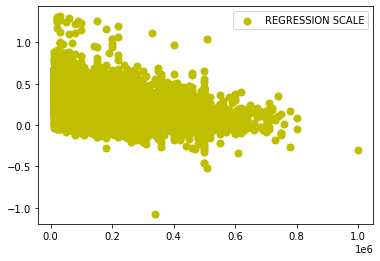

In [60]:
import matplotlib.pyplot as plt
plt.scatter(x_train['LIMIT_BAL'],pred_train,label='REGRESSION SCALE',c='y',lw=2)
plt.legend()

In [63]:
from sklearn.linear_model import ElasticNet
lr=ElasticNet()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))


[0.29727364 0.25195619 0.25795703 ... 0.27501188 0.18227663 0.27765763]
TRain MSE= 0.16702584018023137
R2 train= 0.0304446669225934


In [65]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

[0.29717065 0.25184171 0.25789159 ... 0.27512143 0.18247334 0.27774009]
TRain MSE= 0.16702587057716675
R2 train= 0.030444490473782837


In [64]:
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

[0.47434731 0.17589433 0.22962002 ... 0.72592552 0.29120434 0.28100585]
TRain MSE= 0.15092742194412312
R2 train= 0.12389312518562001


CLEARLY RIDGE IS SHOWING BETTER PERFORMANCE THAN ELASTIC NET AND LASSO


In [67]:
# TERY ANOTHER MODEL
####### load a model
from sklearn.tree import DecisionTreeRegressor
lr=DecisionTreeRegressor(max_depth=3)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

[0.54814815 0.37312415 0.11501992 ... 0.71502058 0.11501992 0.11501992]
TRain MSE= 0.13825109600521085
R2 train= 0.19747694553723594


CLEARLY DECISION TREE IS SHOWING BETTER PERFORMANCE THAN ELASTIC NET


In [68]:
#Try another model
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor(max_depth=3)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
print(pred_train)
print('TRain MSE=',mean_squared_error(y_train,lr.predict(x_train)))
print('R2 train=',r2_score(y_train,lr.predict(x_train)))

[0.60797604 0.39505973 0.13939486 ... 0.71873228 0.11505243 0.11353227]
TRain MSE= 0.13732164118241164
R2 train= 0.20287226568247285
